In [1]:
import numpy as np
import matplotlib.pyplot as plt
%autosave 60

Autosaving every 60 seconds


Text(0.5, 1.05, 'A line plot on a polar axis')

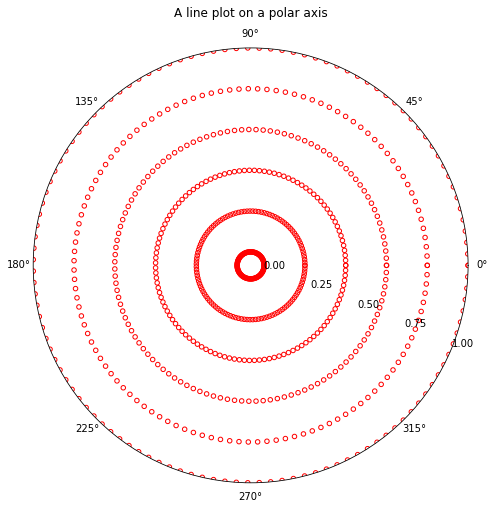

In [2]:
L = 5
r = np.linspace(0, 1, L+1)
thetas = np.linspace(0, 2*np.pi, np.math.factorial(L))
fig, ax = plt.subplots(1,1, figsize = (10,8),subplot_kw={'projection': 'polar'})
for theta in thetas:
    ax.scatter(np.ones_like(r)*theta, r, s=20, marker = 'o', facecolors='none', edgecolors='r')
ax.set_rmax(1)
ax.set_rticks(np.linspace(0,1,5))  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(False)

ax.set_title("A line plot on a polar axis", va='bottom')

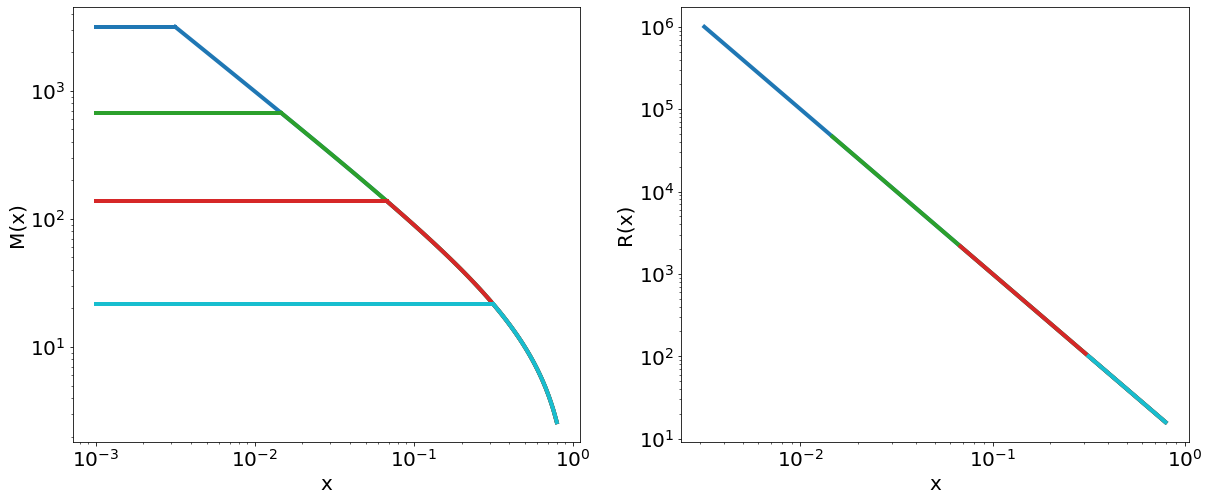

In [34]:
U = 10
L = 1
t = np.linspace(0,1,100)
fig, ax = plt.subplots(1,2, figsize=(20,8))
colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:cyan']
for x_tilde, color in zip (np.logspace(-2.5, -0.5, 4), colors):
    x1 = np.logspace(-3,np.log10(x_tilde),100)
    x2 = np.logspace(np.log10(x_tilde),-0.1,100)
    M = (U/L)*((1/x2) - 1)
    R = (U/L)*((1/x2)**2)
    ax[0].plot(x1, (U/L)*(x_tilde**(-1)-1)*np.ones_like(x1), color = color, linewidth = 4)
    ax[0].plot(x2, M, color = color, linewidth = 4)
    
    #ax[1].plot(x1, np.zeros_like(x1), color = 'tab:red', linewidth = 4)
    ax[1].plot(x2, R, color = color, linewidth = 4)
    
ax[0].set_xlabel('x', fontsize = 20)
ax[0].set_ylabel('M(x)', fontsize = 20)
ax[0].tick_params(labelsize = 20)
ax[0].set_xscale('log')
ax[0].set_yscale('log')

ax[1].set_xlabel('x', fontsize = 20)
ax[1].set_ylabel('R(x)', fontsize = 20)
ax[1].tick_params(labelsize = 20)
ax[1].set_xscale('log')
ax[1].set_yscale('log')

fig.savefig('../Figures/M_P.png')

## Solving for $\rho$ in the case of infection

In [134]:
def n_r(rho, R, U, l):
    r_array = np.linspace(0, R, 1000)
    delta_r = R/1000
    return sum((U*np.exp(l*r_array)*delta_r)/(1+np.exp(r_array-np.log(rho))))

In [137]:
n_r(1e7, 1e-3, 2, 10)

0.0020100332324966036

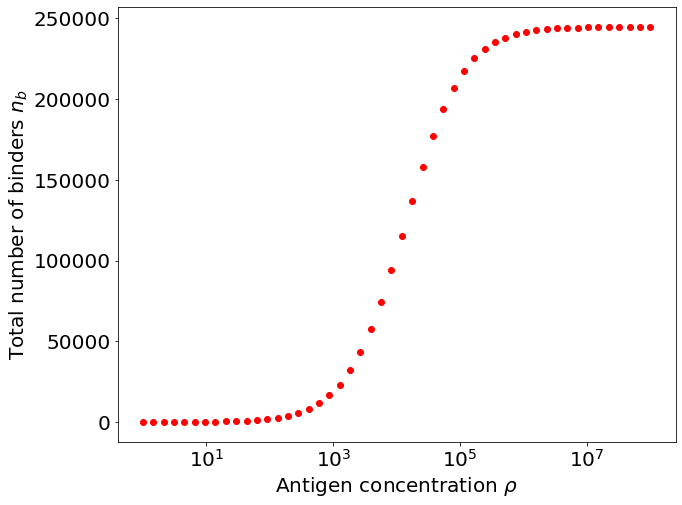

In [136]:
fig, ax = plt.subplots(figsize=(10,8))
rho_array = np.logspace(0, 8, 50)
for rho in rho_array:
    ax.plot(rho, n_r(rho, 10, 1e-3, 2), 'or')
ax.set_xscale('log')
ax.set_xlabel(r'Antigen concentration $\rho$', fontsize = 20)
ax.set_ylabel(r'Total number of binders $n_b$', fontsize = 20)
ax.tick_params(labelsize = 20)

In [270]:
U = 1e-6
R = 9
l = 2
T = 20
beta = 2
gamma = 0.1
eta = .01
intervals = 5000
Time = np.linspace(0,T, intervals)
delta_t = T/intervals
Rho = np.zeros(intervals)
N_r = np.zeros(intervals)
Rho[0] = 1
for i in range(1,intervals):
    N_r[i] = N_r[i-1] + (n_r(Rho[i-1], R, U, l) + gamma * N_r[i-1]*(1-(N_r[i-1]/1000)))*delta_t
    Rho[i] = Rho[i-1] + (beta*Rho[i-1] - eta*Rho[i-1]*np.cumsum(N_r*delta_t)[-1])*delta_t
#___________________________________________________________________
rho_array = np.logspace(0, 8, 100)
n_r_array = np.zeros_like(rho_array)
for i, rho in enumerate(rho_array):
    n_r_array[i] = n_r(rho, R, U, l)
    

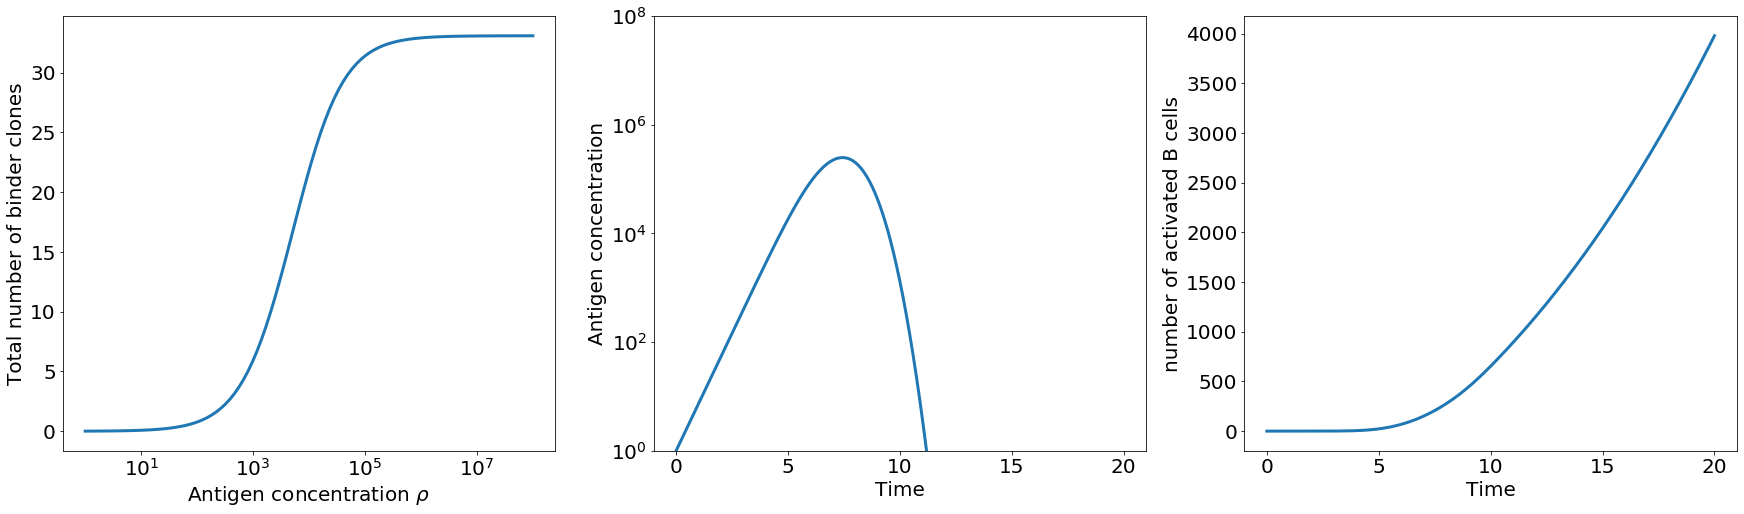

In [271]:
fig, ax = plt.subplots(1,3, figsize=(30,8))
#___________________________________________________________________
ax[0].plot(rho_array, n_r_array, linewidth = 3)
#ax[0].plot(rho_array, beta*np.ones_like(rho_array))
ax[0].set_xscale('log')
#ax[0].set_yscale('log')
ax[0].set_xlabel(r'Antigen concentration $\rho$', fontsize = 20)
ax[0].set_ylabel(r'Total number of binder clones', fontsize = 20)
ax[0].tick_params(labelsize = 20)
#ax[0].legend(fontsize = 20, loc=0)
#___________________________________________________________________
ax[1].plot(Time, Rho, linewidth = 3)
ax[1].set_xlabel(r'Time', fontsize = 20)
ax[1].set_ylabel(r'Antigen concentration', fontsize = 20)
ax[1].tick_params(labelsize = 20)
ax[1].set_ylim(1, 1e8)
#ax[1].set_xlim(0, .5)
ax[1].set_yscale('log')
#___________________________________________________________________
ax[2].plot(Time, np.cumsum(N_r*delta_t), linewidth = 3)
ax[2].set_xlabel(r'Time', fontsize = 20)
ax[2].set_ylabel(r'number of activated B cells', fontsize = 20)
ax[2].tick_params(labelsize = 20)
#ax[2].set_ylim(1, 1e8)
#ax[2].set_xlim(0, .5)
#ax[2].set_yscale('log')